In [1]:
import numpy as np
import matplotlib.pyplot as plt 

import pandas as pd  
import seaborn as sns 

In [2]:
from sklearn.datasets import load_boston
boston_dataset = load_boston()

In [7]:
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [11]:
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston['MEDV'] = boston_dataset.target
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


<AxesSubplot:>

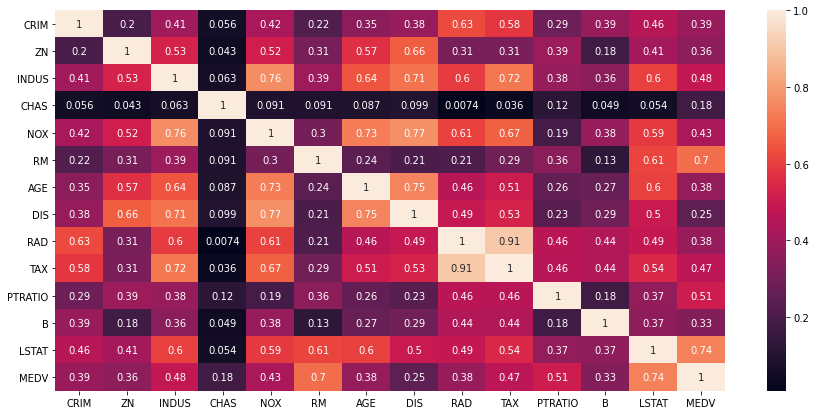

In [14]:
plt.figure(figsize=(15, 7))
sns.heatmap(boston.corr().abs(),  annot=True)

# Standard assumptions for regression analysis

Let’s look at the important assumptions in regression analysis:

1. There should be a linear and additive relationship between dependent (response) variable and independent (predictor) variable(s).
2. There should be no correlation between the residual (error) terms. Absence of this phenomenon is known as Autocorrelation.
3. The independent variables should not be correlated. Absence of this phenomenon is known as multicollinearity.
4. The error terms must have constant variance. This phenomenon is known as homoskedasticity. The presence of non-constant variance is referred to heteroskedasticity.
5. The error terms must be normally distributed.

## 1. Linear relationship

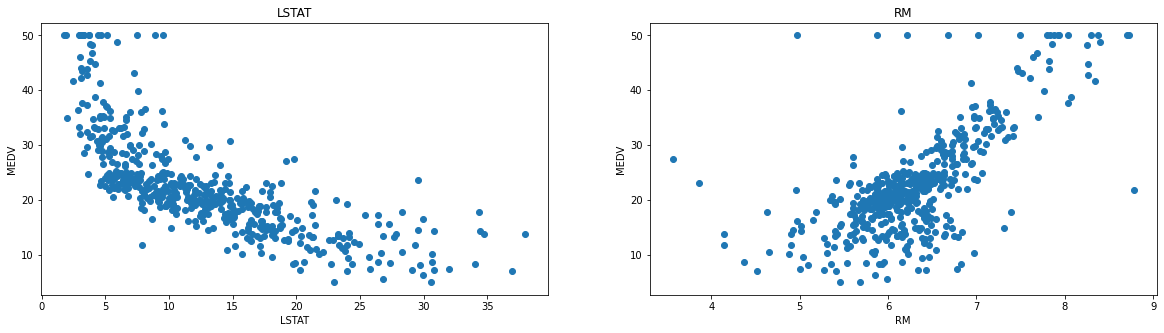

In [15]:
plt.figure(figsize=(20, 5))

features = ['LSTAT', 'RM']
target = boston['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = boston[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

Here we can tell that there is a linear relationship between 'LSTAT' and 'MEDV', and 'RM' and 'MEDV'.

In [18]:
X = pd.DataFrame(np.c_[boston['LSTAT'], boston['RM']], columns = ['LSTAT','RM'])
Y = boston['MEDV']
print(X.shape, y.shape)

(506, 2) (506,)


In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)
type(Y_test)

(404, 2) (404,) (102, 2) (102,)


pandas.core.series.Series

### Residual vs Fitted Values graph for Linear Features

In [66]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)
print(lin_model.coef_, lin_model.intercept_)


[-0.71722954  4.58938833] 2.73624034260661


In [34]:
# model evaluation for training set
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print('Training set, RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print('Testing set, RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

Training set, RMSE is 5.6371293350711955
R2 score is 0.6300745149331701


Testing set, RMSE is 5.137400784702911
R2 score is 0.6628996975186952


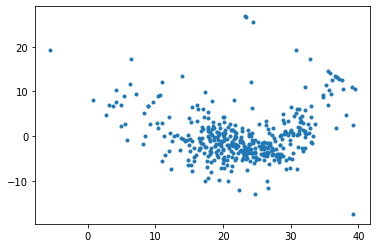

In [44]:
plt.scatter(y_train_predict, Y_train - y_train_predict, marker='.')

Since the residual vs prediction graph is parabolic, it means there is non-linearity in the data. So let us try adding polynomial features in the data.

### Residual vs Fitted Values graph for Polynomial Features

In [65]:
from sklearn.preprocessing import PolynomialFeatures

poly_preprocess = PolynomialFeatures(degree=2)
X_train_poly = poly_preprocess.fit_transform(X_train)
X_test_poly = poly_preprocess.fit_transform(X_test)
print(X_train_poly.shape, X_test_poly.shape)

poly_model = LinearRegression()
poly_model.fit(X_train_poly, Y_train)
print(poly_model.coef_, poly_model.intercept_)

(404, 6) (102, 6)
[ 0.00000000e+00  3.83697264e-01 -1.39401742e+01  1.08698012e-02
 -2.46917043e-01  1.60438591e+00] 57.75501206870402


In [62]:
# model evaluation for training set
y_train_predict = poly_model.predict(X_train_poly)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print('Training set, RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = poly_model.predict(X_test_poly)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print('Testing set, RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

Training set, RMSE is 4.703071027847756
R2 score is 0.7425094297364765


Testing set, RMSE is 3.7848198845450294
R2 score is 0.8170372495892189


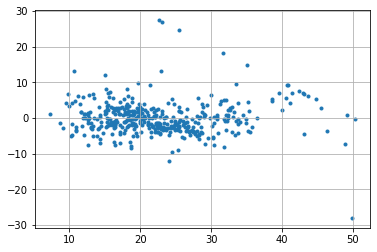

In [63]:
plt.grid()
plt.scatter(y_train_predict, Y_train - y_train_predict, marker='.')

## 2. Normal distribution of error terms

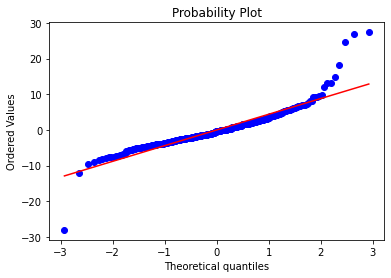

In [77]:
import scipy.stats as stats

stats.probplot(Y_train - y_train_predict, dist="norm", plot=plt)
plt.show()